In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('../data/smoking_driking.csv')

# convert Y and N of the last column to 1 and 0
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})
new_df = df.loc[:99999, :]
new_df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


# Smoking

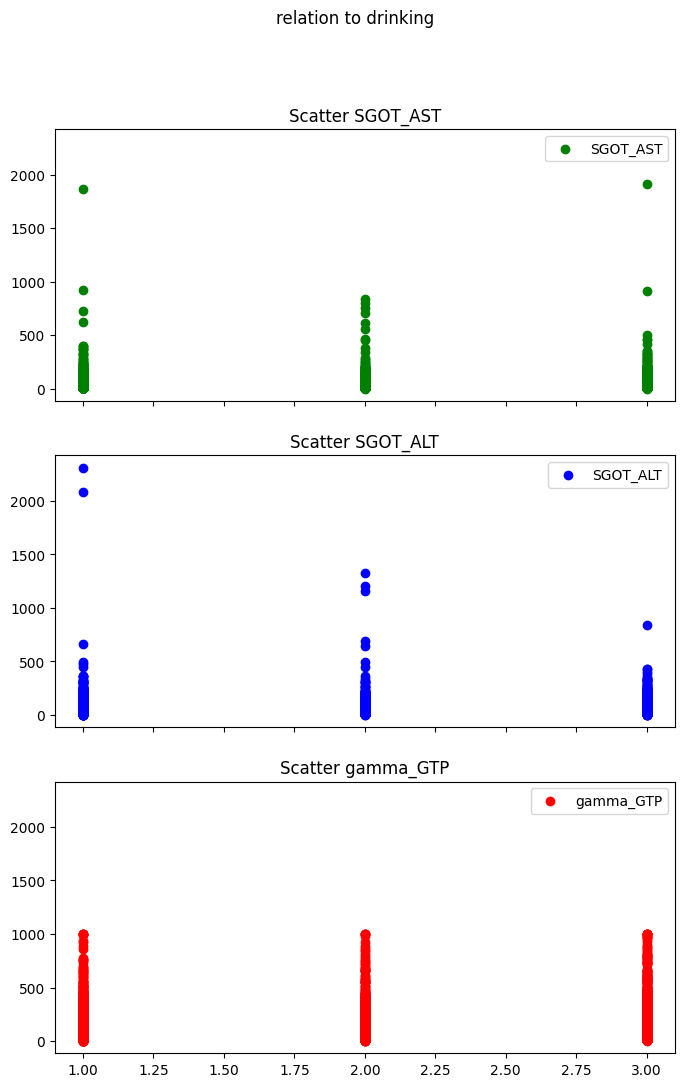

In [42]:
# Plotting the data
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8, 12))

axs[0].scatter(new_df['SMK_stat_type_cd'], new_df[['SGOT_AST']], label='SGOT_AST', marker='o', color='green')
axs[0].set_title('Scatter SGOT_AST')
axs[0].legend()

axs[1].scatter(new_df[['SMK_stat_type_cd']], new_df['SGOT_ALT'], label='SGOT_ALT', marker='o', color='blue')
axs[1].set_title('Scatter SGOT_ALT')
axs[1].legend()


axs[2].scatter(new_df[['SMK_stat_type_cd']], new_df['gamma_GTP'], label='gamma_GTP', marker='o', color='red')
axs[2].set_title('Scatter gamma_GTP')
axs[2].legend()

fig.suptitle('relation to drinking')

# Show the plot
plt.show()

# Drinking

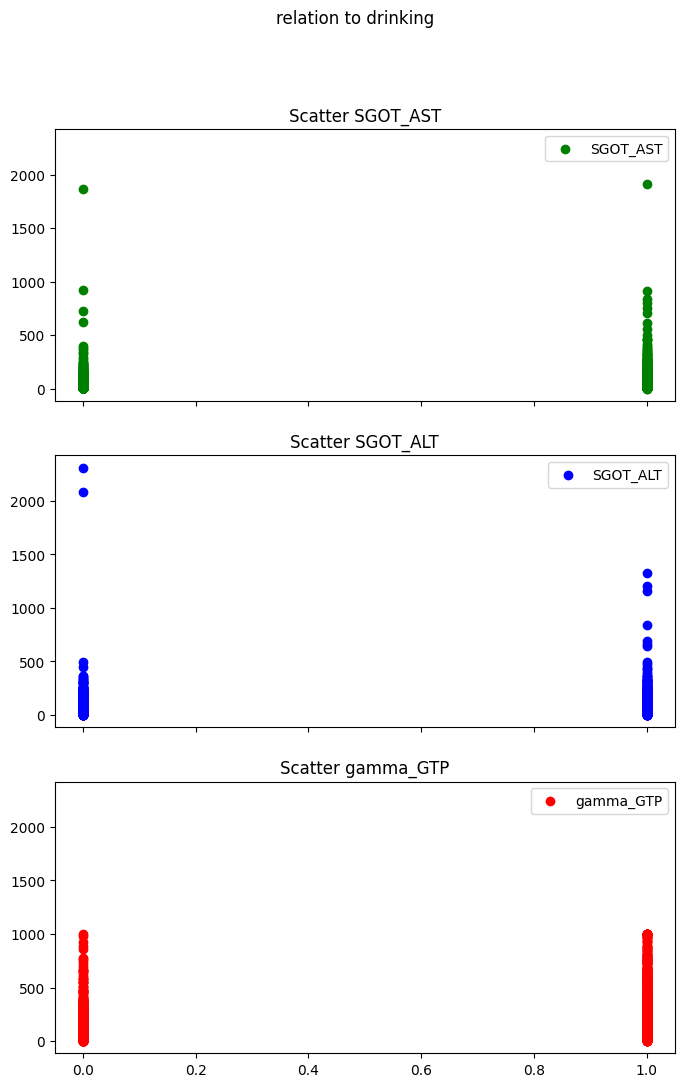

In [46]:
# Plotting the data
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8, 12))

axs[0].scatter(new_df['DRK_YN'], new_df[['SGOT_AST']], label='SGOT_AST', marker='o', color='green')
axs[0].set_title('Scatter SGOT_AST')
axs[0].legend()

axs[1].scatter(new_df[['DRK_YN']], new_df['SGOT_ALT'], label='SGOT_ALT', marker='o', color='blue')
axs[1].set_title('Scatter SGOT_ALT')
axs[1].legend()


axs[2].scatter(new_df[['DRK_YN']], new_df['gamma_GTP'], label='gamma_GTP', marker='o', color='red')
axs[2].set_title('Scatter gamma_GTP')
axs[2].legend()

fig.suptitle('relation to drinking')

# Show the plot
plt.show()

In [85]:
# removing outliers (> 1000)
(new_df['SGOT_AST'] > 1000).sum()

2

In [ ]:
removed_df = new_df[(new_df['SGOT_AST'] <= 1000) & (new_df['SGOT_ALT'] <= 1000)]

Subset 0 - Mean: 25.0005, Std Dev: 12.9416, Median: 22.0000
Subset 1 - Mean: 26.7601, Std Dev: 17.7155, Median: 23.0000


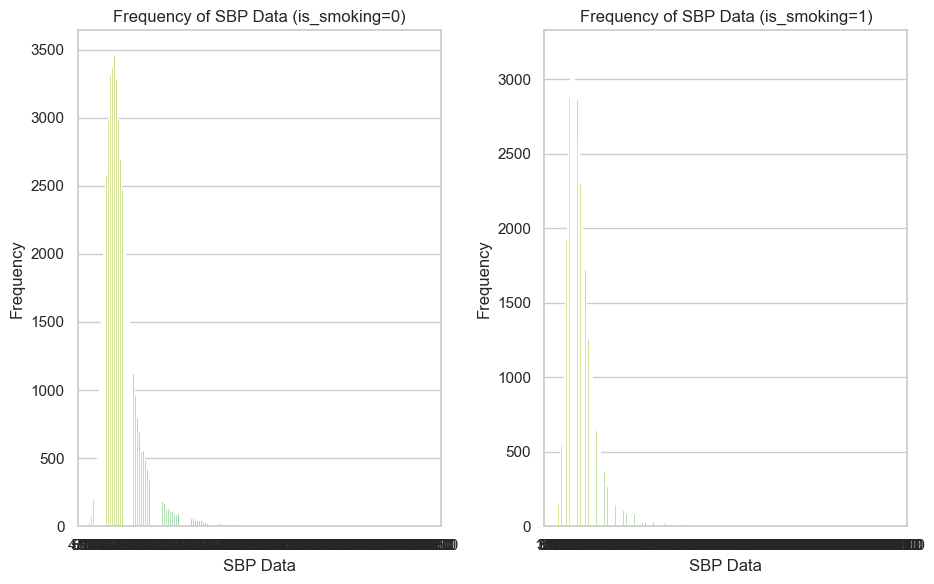

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

for idx, smoking_status in enumerate([0, 1], start=1):
    plt.subplot(1, 3, idx)
    subset_data = (removed_df['SGOT_AST'])[new_df['DRK_YN'] == smoking_status]
    print(f"Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    sns.countplot(x=subset_data, palette=f'viridis_r')
    plt.xlabel('SBP Data')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of SBP Data (is_smoking={smoking_status})')

plt.tight_layout()
plt.show()